# Lecture 0: Fundamentals

> **By:** Lavoisier Wah

> **Affiliation:** Max Planck Institute for the Science of Light, Germany

> **Date:** February 2026

This notebook provides a comprehensive introduction to the tools and concepts needed to build Neural Quantum States (NQS). We'll cover:

1. **NumPy**: Numerical computing and linear algebra
2. **SciPy**: Scientific computing and optimization
3. **Matplotlib**: Data visualization
4. **TensorFlow**: Deep learning framework
5. **Quantum Mechanics Basics**: Wavefunctions and variational methods
6. **Neural Quantum States**: Representing quantum states with neural networks

## Prerequisites
Basic knowledge of Python, quantum mechanics, and linear algebra is helpful but not required.

## 1. NumPy: The Foundation of Numerical Computing

NumPy is essential for working with arrays and performing numerical operations efficiently.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from scipy import sparse, linalg

print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"TensorFlow version: {tf.__version__}")

NumPy version: 1.25.2
SciPy version: 1.14.1
TensorFlow version: 2.14.0


### 1.1 Basic Array Operations

In [2]:
# Creating arrays
a = np.array([1, 2, 3, 4, 5])
b = np.linspace(0, 10, 50)  # 50 points from 0 to 10
c = np.zeros((3, 3))  # 3x3 matrix of zeros
d = np.eye(3)  # 3x3 identity matrix

print("Array a:", a)
print("Shape of b:", b.shape)
print("Identity matrix:\n", d)

Array a: [1 2 3 4 5]
Shape of b: (50,)
Identity matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 1.2 Array Mathematics and Broadcasting

In [3]:
# Element-wise operations
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("Sum:", x + y)
print("Product:", x * y)
print("Dot product:", np.dot(x, y))

# Broadcasting: operations between arrays of different shapes
matrix = np.array([[1, 2, 3], [4, 5, 6]])
vector = np.array([1, 0, 1])
result = matrix + vector  # vector is broadcast to each row
print("Broadcast result:\n", result)

Sum: [5 7 9]
Product: [ 4 10 18]
Dot product: 32
Broadcast result:
 [[2 2 4]
 [5 5 7]]


### 1.3 Linear Algebra with NumPy

In [4]:
# Matrix operations
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Matrix multiplication
C = A @ B  # or np.matmul(A, B)
print("Matrix product A @ B:\n", C)

# Eigenvalues and eigenvectors (crucial for quantum mechanics!)
eigenvalues, eigenvectors = np.linalg.eig(A)
print("\nEigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Inverse and determinant
A_inv = np.linalg.inv(A)
det_A = np.linalg.det(A)
print("\nDeterminant:", det_A)
print("Inverse:\n", A_inv)

Matrix product A @ B:
 [[19 22]
 [43 50]]

Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]

Determinant: -2.0000000000000004
Inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]


### 1.4 Complex Numbers (Essential for Quantum Mechanics)

In [5]:
# Complex arrays
psi = np.array([1+2j, 3-1j, 0+1j])
print("Complex wavefunction:", psi)
print("Real part:", psi.real)
print("Imaginary part:", psi.imag)
print("Complex conjugate:", np.conj(psi))
print("Magnitude:", np.abs(psi))

# Normalization (important for quantum states)
psi_normalized = psi / np.linalg.norm(psi)
print("\nNormalized wavefunction:", psi_normalized)
print("Norm (should be 1):", np.linalg.norm(psi_normalized))

Complex wavefunction: [1.+2.j 3.-1.j 0.+1.j]
Real part: [1. 3. 0.]
Imaginary part: [ 2. -1.  1.]
Complex conjugate: [1.-2.j 3.+1.j 0.-1.j]
Magnitude: [2.23606798 3.16227766 1.        ]

Normalized wavefunction: [0.25+0.5j  0.75-0.25j 0.  +0.25j]
Norm (should be 1): 1.0


### Exercise 1: Create a Pauli Matrix

The Pauli-Z matrix is fundamental in quantum computing:
$$\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

Create this matrix and find its eigenvalues and eigenvectors.

In [6]:
# Your code here
pauli_z = np.array([[1, 0], [0, -1]])
eigenvals, eigenvecs = np.linalg.eig(pauli_z)
print("Eigenvalues:", eigenvals)
print("Eigenvectors:\n", eigenvecs)

Eigenvalues: [ 1. -1.]
Eigenvectors:
 [[1. 0.]
 [0. 1.]]


## 2. Matplotlib: Visualizing Data

Visualization is crucial for understanding quantum states and neural network behavior.

### 2.1 Basic Plotting

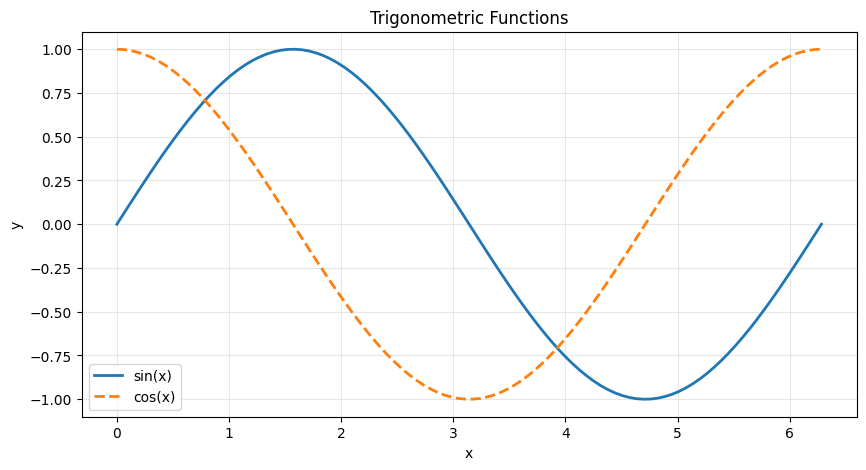

In [7]:
# Simple line plot
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='sin(x)', linewidth=2)
plt.plot(x, y2, label='cos(x)', linewidth=2, linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trigonometric Functions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.2 Visualizing Complex Wavefunctions

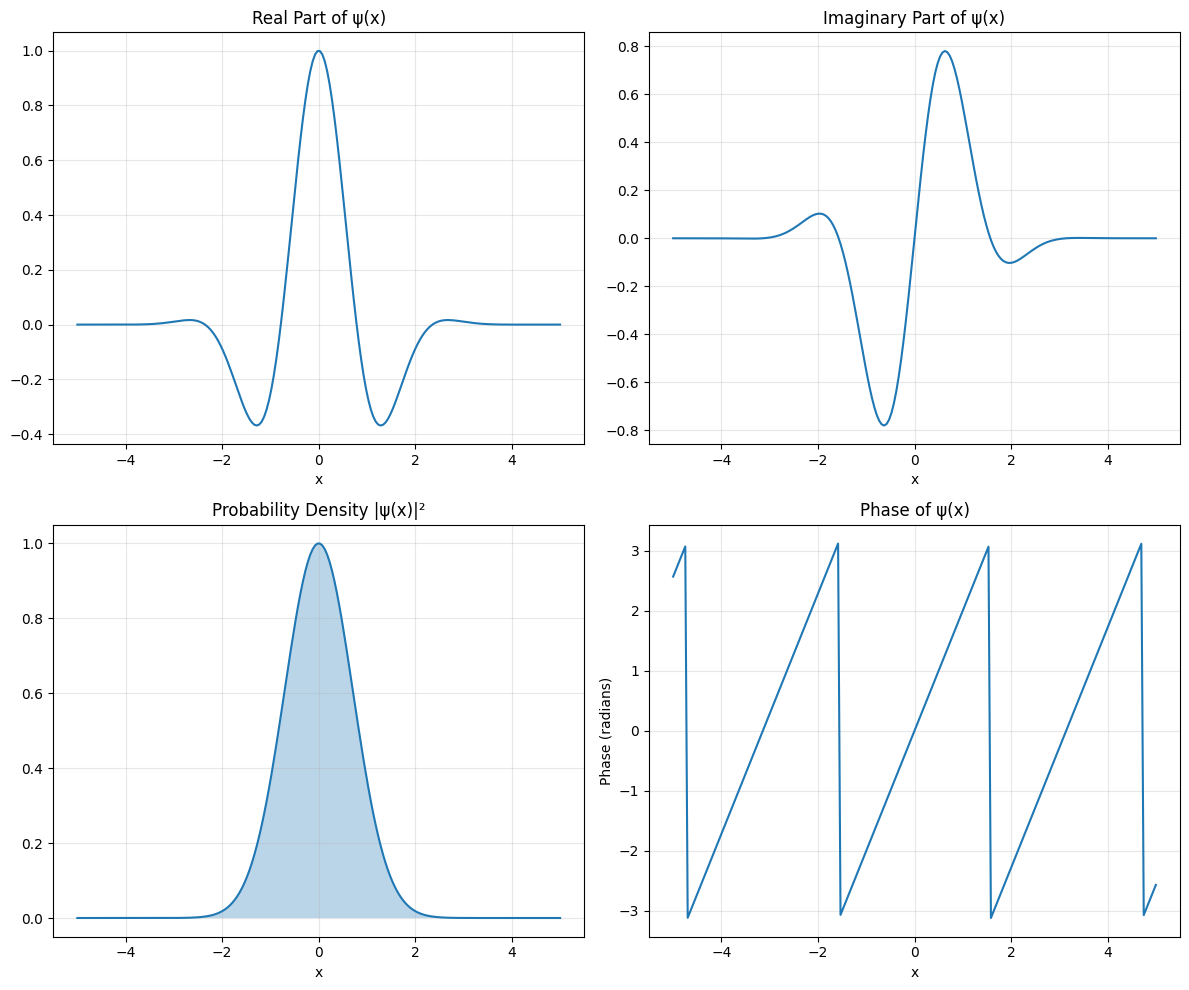

In [8]:
# Example: Plotting a complex wavefunction
x = np.linspace(-5, 5, 200)
psi = np.exp(-x**2/2) * np.exp(1j * 2*x)  # Gaussian with phase

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Real part
axes[0, 0].plot(x, psi.real)
axes[0, 0].set_title('Real Part of ψ(x)')
axes[0, 0].set_xlabel('x')
axes[0, 0].grid(True, alpha=0.3)

# Imaginary part
axes[0, 1].plot(x, psi.imag)
axes[0, 1].set_title('Imaginary Part of ψ(x)')
axes[0, 1].set_xlabel('x')
axes[0, 1].grid(True, alpha=0.3)

# Probability density
axes[1, 0].plot(x, np.abs(psi)**2)
axes[1, 0].set_title('Probability Density |ψ(x)|²')
axes[1, 0].set_xlabel('x')
axes[1, 0].fill_between(x, np.abs(psi)**2, alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)

# Phase
axes[1, 1].plot(x, np.angle(psi))
axes[1, 1].set_title('Phase of ψ(x)')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Phase (radians)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Heatmaps and 2D Plots

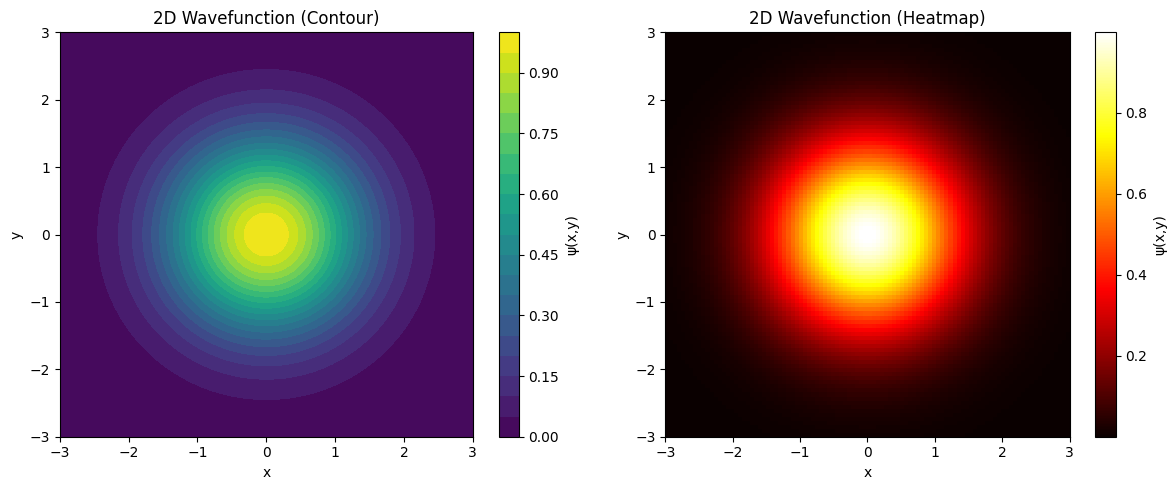

In [9]:
# 2D quantum harmonic oscillator ground state
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
psi_2d = np.exp(-(X**2 + Y**2)/2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, psi_2d, levels=20, cmap='viridis')
plt.colorbar(label='ψ(x,y)')
plt.title('2D Wavefunction (Contour)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.imshow(psi_2d, extent=[-3, 3, -3, 3], origin='lower', cmap='hot')
plt.colorbar(label='ψ(x,y)')
plt.title('2D Wavefunction (Heatmap)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

## 3. SciPy: Scientific Computing and Optimization

SciPy provides tools for optimization, interpolation, integration, and more.

### 3.1 Sparse Matrices (Essential for Large Quantum Systems)

In [10]:
from scipy.sparse import csr_matrix, linalg as sparse_linalg

# Create a sparse Hamiltonian (most entries are zero)
# Example: 1D tight-binding model
N = 10  # number of sites
diag = -2 * np.ones(N)  # diagonal elements
off_diag = np.ones(N-1)  # off-diagonal elements

H = sparse.diags([off_diag, diag, off_diag], [-1, 0, 1], format='csr')
print("Sparse Hamiltonian shape:", H.shape)
print("Number of non-zero elements:", H.nnz)
print("\nDense representation:\n", H.toarray())

Sparse Hamiltonian shape: (10, 10)
Number of non-zero elements: 28

Dense representation:
 [[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]


### 3.2 Eigenvalue Problems for Quantum Systems

First 5 eigenvalues (energies):
[-3.91898595 -3.68250707 -3.30972147 -2.83083003 -2.28462968]


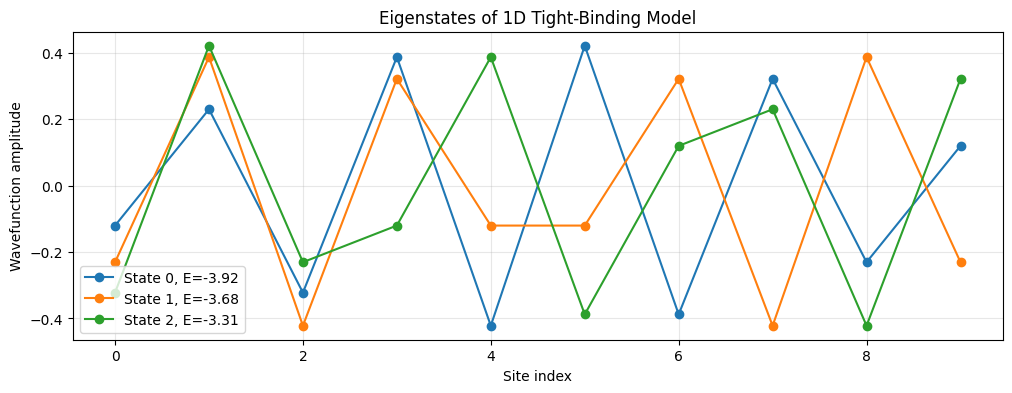

In [11]:
# Find ground state and excited states
num_states = 5
eigenvalues, eigenvectors = sparse_linalg.eigsh(H, k=num_states, which='SA')  # 'SA' = smallest algebraic

print(f"First {num_states} eigenvalues (energies):")
print(eigenvalues)

# Visualize the first few eigenstates
plt.figure(figsize=(12, 4))
for i in range(min(3, num_states)):
    plt.plot(eigenvectors[:, i], 'o-', label=f'State {i}, E={eigenvalues[i]:.2f}')
plt.xlabel('Site index')
plt.ylabel('Wavefunction amplitude')
plt.title('Eigenstates of 1D Tight-Binding Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.3 Optimization (Core of Variational Methods)

In [12]:
from scipy.optimize import minimize

# Example: Find minimum of a simple function
def energy_functional(params):
    """Example energy functional E(α, β) = α² + β² + 2αβ"""
    alpha, beta = params
    return alpha**2 + beta**2 + 2*alpha*beta

# Initial guess
initial_params = [1.0, 1.0]

# Optimize
result = minimize(energy_functional, initial_params, method='BFGS')
print("Optimization result:")
print(f"Optimal parameters: {result.x}")
print(f"Minimum energy: {result.fun}")
print(f"Success: {result.success}")

Optimization result:
Optimal parameters: [-5.53432000e-09 -5.53432006e-09]
Minimum energy: 1.2251479277924191e-16
Success: True


### 3.4 Numerical Integration

In [13]:
from scipy import integrate

# Calculate expectation value ⟨x²⟩ for Gaussian wavefunction
def integrand(x):
    psi = np.exp(-x**2/2) / (np.pi**0.25)  # Normalized Gaussian
    return x**2 * np.abs(psi)**2

expectation_x2, error = integrate.quad(integrand, -np.inf, np.inf)
print(f"⟨x²⟩ = {expectation_x2:.4f} (error: {error:.2e})")
print(f"Analytical value: 0.5")

⟨x²⟩ = 0.5000 (error: 9.09e-09)
Analytical value: 0.5


## 4. TensorFlow: Deep Learning Framework

TensorFlow will be used to build neural networks that represent quantum states.

### 4.1 TensorFlow Basics

In [14]:
# Tensors are multi-dimensional arrays
tensor_0d = tf.constant(42)  # Scalar
tensor_1d = tf.constant([1, 2, 3, 4])  # Vector
tensor_2d = tf.constant([[1, 2], [3, 4]])  # Matrix

print("Scalar:", tensor_0d)
print("Vector:", tensor_1d)
print("Matrix:\n", tensor_2d)

# Complex tensors (for quantum states)
complex_tensor = tf.constant([1+2j, 3-1j, 0+1j])
print("\nComplex tensor:", complex_tensor)

Scalar: tf.Tensor(42, shape=(), dtype=int32)
Vector: tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
Matrix:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)

Complex tensor: tf.Tensor([1.+2.j 3.-1.j 0.+1.j], shape=(3,), dtype=complex128)


### 4.2 Automatic Differentiation (Gradient Computation)

In [15]:
# Automatic differentiation is crucial for training neural networks
x = tf.Variable(3.0)

# Record operations for gradient computation
with tf.GradientTape() as tape:
    y = x**2 + 2*x + 1

# Compute gradient dy/dx
dy_dx = tape.gradient(y, x)
print(f"y = x² + 2x + 1")
print(f"At x = {x.numpy()}: y = {y.numpy()}, dy/dx = {dy_dx.numpy()}")
print(f"Analytical derivative at x=3: 2*3 + 2 = {2*3 + 2}")

y = x² + 2x + 1
At x = 3.0: y = 16.0, dy/dx = 8.0
Analytical derivative at x=3: 2*3 + 2 = 8


### 4.3 Building a Simple Neural Network

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

# Simple feedforward network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer
])

model.summary()

# Test the network
test_input = tf.random.normal((5, 10))  # 5 samples, 10 features each
output = model(test_input)
print("\nOutput shape:", output.shape)
print("Sample outputs:", output.numpy().flatten())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Output shape: (5, 1)
Sample outputs: [0.1322728  0.54636014 0.37796664 0.08197986 0.47729456]


### 4.4 Custom Layers and Models

In [17]:
class ComplexDense(keras.layers.Layer):
    """Custom layer that handles complex numbers"""
    
    def __init__(self, units, **kwargs):
        super().__init__(**kwargs)
        self.units = units
    
    def build(self, input_shape):
        # Create complex-valued weights
        self.w_real = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True,
            name='w_real'
        )
        self.w_imag = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True,
            name='w_imag'
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True,
            name='bias'
        )
    
    def call(self, inputs):
        # Complex matrix multiplication
        w = tf.complex(self.w_real, self.w_imag)
        return tf.matmul(inputs, w) + tf.cast(self.b, dtype=tf.complex64)

# Test the complex layer
complex_layer = ComplexDense(5)
complex_input = tf.complex(tf.random.normal((3, 4)), tf.random.normal((3, 4)))
complex_output = complex_layer(complex_input)
print("Complex layer output shape:", complex_output.shape)
print("Complex layer output:", complex_output)

Complex layer output shape: (3, 5)
Complex layer output: tf.Tensor(
[[-1.7597995 +0.12984389j  1.3057227 +1.313515j   -0.16333456-0.45432797j
  -0.65509415-0.05063522j  0.21360755-0.27779382j]
 [ 1.0033476 +1.4621289j  -0.13203001+0.88973397j  0.98721015+1.6823118j
   0.2936046 -1.6753769j   0.43070352-0.7679547j ]
 [ 0.9769635 +0.45052505j  0.6991585 -1.2239486j   0.44184482-0.09682679j
  -1.2898957 +1.9975854j  -0.6247132 +0.8149328j ]], shape=(3, 5), dtype=complex64)


### 4.5 Training Loop Example

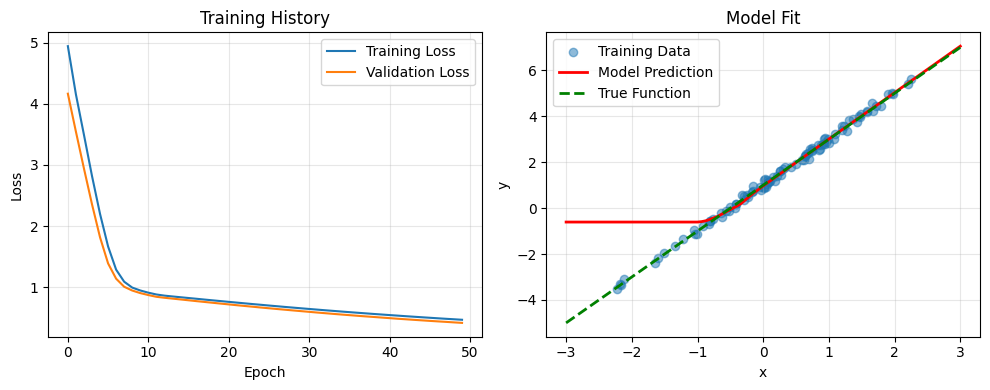

In [18]:
# Simple regression example
# Generate synthetic data: y = 2x + 1 + noise
x_train = np.random.randn(1000, 1)
y_train = 2 * x_train + 1 + 0.1 * np.random.randn(1000, 1)

# Build model
simple_model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])

# Compile model
simple_model.compile(optimizer='adam', loss='mse')

# Train
history = simple_model.fit(x_train, y_train, epochs=50, verbose=0, validation_split=0.2)

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training History')
plt.grid(True, alpha=0.3)

# Test predictions
x_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = simple_model.predict(x_test, verbose=0)

plt.subplot(1, 2, 2)
plt.scatter(x_train[:100], y_train[:100], alpha=0.5, label='Training Data')
plt.plot(x_test, y_pred, 'r-', linewidth=2, label='Model Prediction')
plt.plot(x_test, 2*x_test + 1, 'g--', linewidth=2, label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model Fit')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Quantum Mechanics Essentials

Before building neural quantum states, we need to understand key quantum mechanics concepts.

### 5.1 Quantum States and Operators

In [19]:
# Spin-1/2 system (qubit)
# Basis states: |0⟩ = [1, 0]ᵀ, |1⟩ = [0, 1]ᵀ
ket_0 = np.array([1, 0], dtype=complex)
ket_1 = np.array([0, 1], dtype=complex)

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

print("Pauli X:\n", sigma_x)
print("\nPauli Y:\n", sigma_y)
print("\nPauli Z:\n", sigma_z)

# Apply operator to state
result = sigma_x @ ket_0
print("\nσₓ|0⟩ =", result, "= |1⟩")

Pauli X:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Pauli Y:
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

Pauli Z:
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

σₓ|0⟩ = [0.+0.j 1.+0.j] = |1⟩


### 5.2 Multi-Qubit Systems and Tensor Products

In [20]:
# Two-qubit state |00⟩ = |0⟩ ⊗ |0⟩
two_qubit_state = np.kron(ket_0, ket_0)
print("Two-qubit state |00⟩:", two_qubit_state)

# Entangled state (Bell state): (|00⟩ + |11⟩)/√2
bell_state = (np.kron(ket_0, ket_0) + np.kron(ket_1, ket_1)) / np.sqrt(2)
print("\nBell state:", bell_state)

# Operator on two qubits: σₓ ⊗ I
I = np.eye(2, dtype=complex)
sigma_x_I = np.kron(sigma_x, I)
print("\nσₓ ⊗ I shape:", sigma_x_I.shape)
print("σₓ ⊗ I:\n", sigma_x_I)

Two-qubit state |00⟩: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

Bell state: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

σₓ ⊗ I shape: (4, 4)
σₓ ⊗ I:
 [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


### 5.3 Expectation Values and Measurements

In [21]:
# Expectation value ⟨ψ|O|ψ⟩
def expectation_value(state, operator):
    """Calculate ⟨ψ|O|ψ⟩"""
    return np.conj(state) @ operator @ state

# Example: measure σz for different states
print("⟨0|σz|0⟩ =", expectation_value(ket_0, sigma_z).real)
print("⟨1|σz|1⟩ =", expectation_value(ket_1, sigma_z).real)

# Superposition state: (|0⟩ + |1⟩)/√2
plus_state = (ket_0 + ket_1) / np.sqrt(2)
print("⟨+|σz|+⟩ =", expectation_value(plus_state, sigma_z).real)
print("⟨+|σx|+⟩ =", expectation_value(plus_state, sigma_x).real)

⟨0|σz|0⟩ = 1.0
⟨1|σz|1⟩ = -1.0
⟨+|σz|+⟩ = -2.2371143170757382e-17
⟨+|σx|+⟩ = 0.9999999999999998


### 5.4 Hamiltonians and Energy

In [22]:
# Transverse field Ising model: H = -J σz⊗σz - h σx⊗I - h I⊗σx
J = 1.0  # Coupling strength
h = 0.5  # Transverse field strength

H_ising = -J * np.kron(sigma_z, sigma_z) - h * (np.kron(sigma_x, I) + np.kron(I, sigma_x))

print("Transverse Field Ising Hamiltonian:")
print(H_ising.real)

# Find ground state
eigenvalues, eigenvectors = np.linalg.eigh(H_ising)
ground_state = eigenvectors[:, 0]
ground_energy = eigenvalues[0]

print(f"\nGround state energy: {ground_energy:.4f}")
print(f"Ground state: {ground_state}")
print(f"Ground state probabilities: {np.abs(ground_state)**2}")

Transverse Field Ising Hamiltonian:
[[-1.  -0.5 -0.5 -0. ]
 [-0.5  1.  -0.  -0.5]
 [-0.5 -0.   1.  -0.5]
 [-0.  -0.5 -0.5 -1. ]]

Ground state energy: -1.4142
Ground state: [-0.65328148+0.j -0.27059805+0.j -0.27059805+0.j -0.65328148+0.j]
Ground state probabilities: [0.4267767 0.0732233 0.0732233 0.4267767]


## 6. Variational Methods

The variational principle is the foundation of neural quantum states.

### 6.1 Variational Principle

For any normalized trial state $|\psi(\theta)\rangle$:
$$E(\theta) = \langle \psi(\theta) | H | \psi(\theta) \rangle \geq E_0$$

where $E_0$ is the ground state energy. We minimize $E(\theta)$ to find the best approximation.

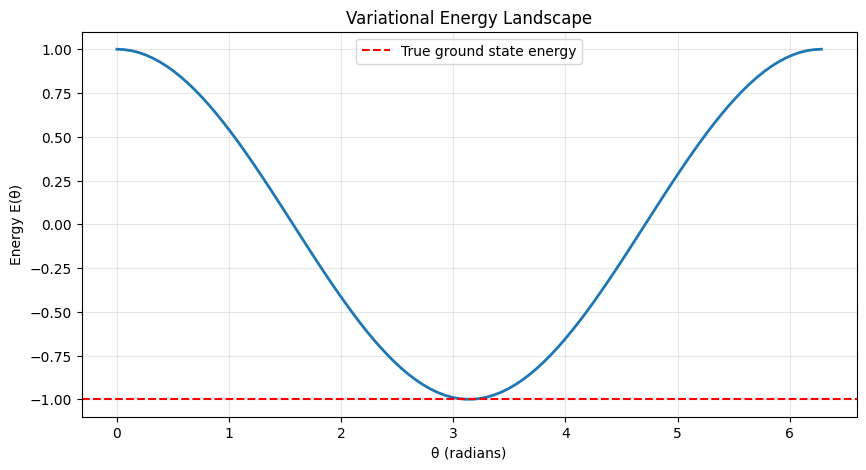

Optimal θ: 3.1099 radians
Variational energy: -0.9995
Optimal state: [0.01586596+0.j 0.99987413+0.j]


In [23]:
# Simple variational example: single qubit in magnetic field
# Trial state: |ψ(θ)⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩

def trial_state(theta):
    """Parameterized trial state"""
    return np.array([np.cos(theta/2), np.sin(theta/2)], dtype=complex)

def variational_energy(theta, H):
    """Energy of trial state"""
    psi = trial_state(theta)
    return np.real(expectation_value(psi, H))

# Hamiltonian: H = σz (eigenvalues: +1, -1)
H_simple = sigma_z

# Scan over theta values
theta_vals = np.linspace(0, 2*np.pi, 100)
energies = [variational_energy(theta, H_simple) for theta in theta_vals]

plt.figure(figsize=(10, 5))
plt.plot(theta_vals, energies, linewidth=2)
plt.axhline(y=-1, color='r', linestyle='--', label='True ground state energy')
plt.xlabel('θ (radians)')
plt.ylabel('Energy E(θ)')
plt.title('Variational Energy Landscape')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find minimum
min_idx = np.argmin(energies)
optimal_theta = theta_vals[min_idx]
print(f"Optimal θ: {optimal_theta:.4f} radians")
print(f"Variational energy: {energies[min_idx]:.4f}")
print(f"Optimal state: {trial_state(optimal_theta)}")

## 8. Advanced Topics and Extensions

Here are some directions to explore further:

### 8.1 More Sophisticated Architectures

- **Restricted Boltzmann Machines (RBM)**: The original NQS architecture
- **Convolutional Neural Networks**: For systems with spatial structure
- **Recurrent Neural Networks**: For 1D systems
- **Transformers**: For capturing long-range correlations
- **Graph Neural Networks**: For arbitrary lattice geometries

### 8.2 Better Sampling Methods

- **Markov Chain Monte Carlo (MCMC)**: Sample according to |ψ(s)|²
- **Metropolis-Hastings algorithm**: Accept/reject configurations
- **Autoregressive sampling**: Sample sequentially using conditional probabilities

### 8.3 Different Physical Systems

- **Fermionic systems**: Electrons in molecules (quantum chemistry)
- **Bosonic systems**: Superfluid helium, Bose-Einstein condensates
- **Continuous variables**: Position-space wavefunctions
- **Open quantum systems**: Including dissipation and decoherence

### 8.4 Observables and Correlation Functions

Beyond energy, we can compute:
- **Magnetization**: ⟨σᶻᵢ⟩
- **Correlation functions**: ⟨σᵢ σⱼ⟩
- **Entanglement entropy**: Measure of quantum correlations
- **Structure factor**: Fourier transform of correlations

## Exercises

1. **Modify the Hamiltonian**: Change J or h and see how the ground state changes
2. **Larger systems**: Try num_spins = 6 or 8 (exact diagonalization becomes harder!)
3. **Different architecture**: Add more layers or use different activation functions
4. **Measure observables**: Compute magnetization ⟨σᶻ⟩ using your trained NQS
5. **Better sampling**: Implement Metropolis-Hastings MCMC instead of random sampling
6. **Heisenberg model**: Implement H = Σᵢ (σˣᵢσˣᵢ₊₁ + σʸᵢσʸᵢ₊₁ + σᶻᵢσᶻᵢ₊₁)

## References and Further Reading

1. **Original NQS paper**: Carleo & Troyer, "Solving the quantum many-body problem with artificial neural networks," Science (2017)
2. **Review article**: Carleo et al., "Machine learning and the physical sciences," Rev. Mod. Phys. (2019)
3. **Variational Monte Carlo**: Ceperley & Alder, "Quantum Monte Carlo," Science (1986)
4. **Quantum computing perspective**: Biamonte et al., "Quantum machine learning," Nature (2017)

**Online Resources**:
- NetKet: Open-source library for NQS (https://www.netket.org/)
- TensorFlow Quantum: Google's quantum ML library
- Qiskit: IBM's quantum computing framework

## Summary

In this notebook, we've covered:

✅ **NumPy**: Arrays, linear algebra, complex numbers
✅ **Matplotlib**: Visualization of quantum states
✅ **SciPy**: Sparse matrices, eigensolvers, optimization
✅ **TensorFlow**: Neural networks, automatic differentiation
✅ **Quantum Mechanics**: States, operators, Hamiltonians
✅ **Variational Methods**: Minimizing energy functionals.


You now have the tools to explore the exciting intersection of quantum physics and machine learning!